<a href="https://colab.research.google.com/github/bibhuprasad19/MultiClassClassify_Independence_AnalyticsVidhya/blob/master/Copy_of_independence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

In [14]:
data=pd.read_csv('/content/drive/My Drive/independence/train.csv')

In [15]:
new_data=pd.read_csv('/content/drive/My Drive/independence/test.csv')

In [16]:
first=pd.DataFrame(data['ABSTRACT'])
sec=pd.DataFrame(new_data['ABSTRACT'])

abst=pd.concat([first,sec],ignore_index=True)

In [17]:
data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [18]:
list(data.iloc[:,3:].columns.values)

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

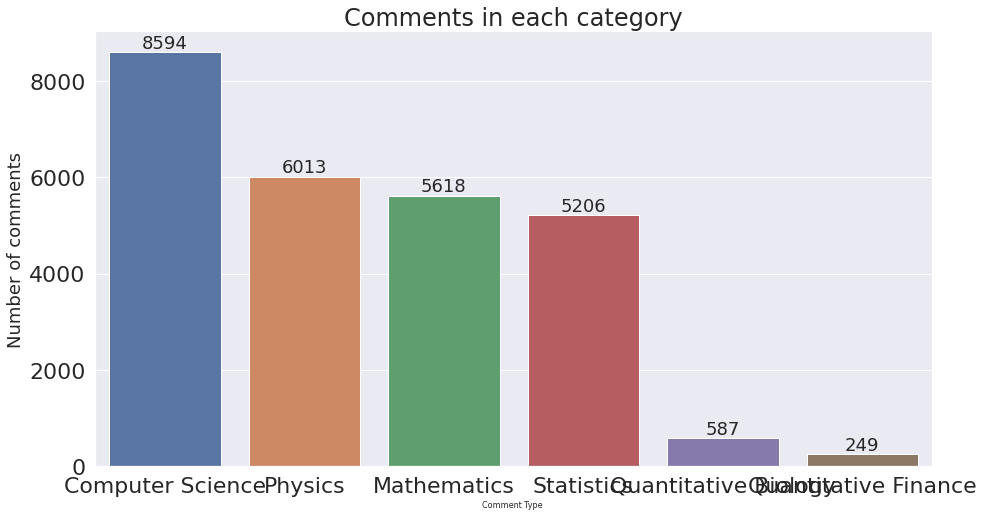

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

categories = list(data.iloc[:,3:].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, data.iloc[:,3:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=8)
#adding the text labels
rects = ax.patches
labels = data.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

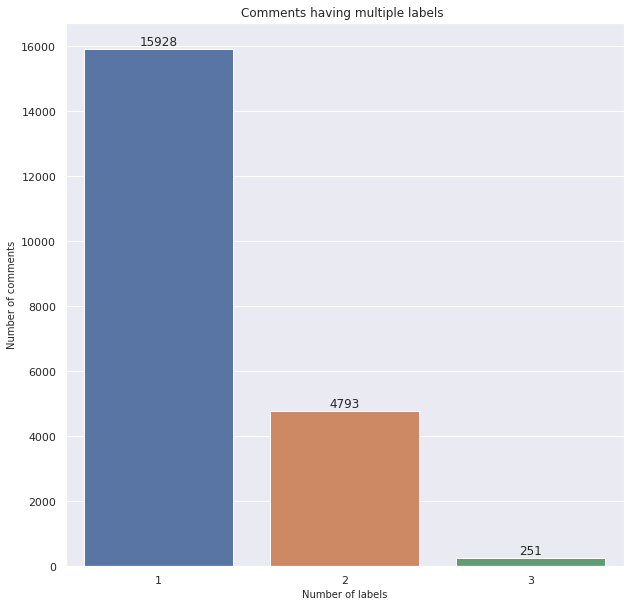

In [20]:
rowSums = data.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sns.set(font_scale = 1)
plt.figure(figsize=(10,10))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=10)
plt.xlabel('Number of labels', fontsize=10)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [21]:
data['ABSTRACT'][1]

'  Rotation invariance and translation invariance have great values in image\nrecognition tasks. In this paper, we bring a new architecture in convolutional\nneural network (CNN) named cyclic convolutional layer to achieve rotation\ninvariance in 2-D symbol recognition. We can also get the position and\norientation of the 2-D symbol by the network to achieve detection purpose for\nmultiple non-overlap target. Last but not least, this architecture can achieve\none-shot learning in some cases using those invariance.\n'

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = data
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['ABSTRACT'] = data['ABSTRACT'].str.lower()
data['ABSTRACT'] = data['ABSTRACT'].apply(cleanHtml)
data['ABSTRACT']= data['ABSTRACT'].apply(keepAlpha)
data['ABSTRACT']= data['ABSTRACT'].apply(cleanPunc)


abst['ABSTRACT'] = abst['ABSTRACT'].str.lower()
abst['ABSTRACT'] = abst['ABSTRACT'].apply(cleanHtml)
abst['ABSTRACT']= abst['ABSTRACT'].apply(keepAlpha)
abst['ABSTRACT']= abst['ABSTRACT'].apply(cleanPunc)

In [23]:
data['ABSTRACT'][1]

'rotation invariance and translation invariance have great values in image recognition tasks  in this paper  we bring a new architecture in convolutional neural network  cnn  named cyclic convolutional layer to achieve rotation invariance in  d symbol recognition  we can also get the position and orientation of the  d symbol by the network to achieve detection purpose for multiple non overlap target  last but not least  this architecture can achieve one shot learning in some cases using those invariance'

In [24]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['ABSTRACT'] = data['ABSTRACT'].apply(removeStopWords)

abst['ABSTRACT'] = abst['ABSTRACT'].apply(removeStopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
data['ABSTRACT'][1]

'rotation invariance  translation invariance  great values  image recognition tasks    paper   bring  new architecture  convolutional neural network  cnn  named cyclic convolutional layer  achieve rotation invariance    symbol recognition     get  position  orientation     symbol   network  achieve detection purpose  multiple non overlap target  last   least   architecture  achieve  shot learning   cases using  invariance'

In [26]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['ABSTRACT'] = data['ABSTRACT'].apply(stemming)


abst['ABSTRACT'] = abst['ABSTRACT'].apply(stemming)

In [27]:
data

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,predict model allow subject specif infer analy...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,rotat invari translat invari great valu imag r...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,introduc develop notion spheric polyharmon nat...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,stochast landau lifshitz gilbert llg equat cou...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,fourier transform infra red ftir spectra sampl...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,machin learn find increas broad applic physic ...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,polycrystallin diamond coat grown cement carbi...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,present new approach identifi situat behaviour...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,sum log normal variat encount mani challeng ap...,0,0,1,1,0,0


In [28]:
data.drop(['TITLE',"ID"],axis=1,inplace=True)

In [29]:
data

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,predict model allow subject specif infer analy...,1,0,0,0,0,0
1,rotat invari translat invari great valu imag r...,1,0,0,0,0,0
2,introduc develop notion spheric polyharmon nat...,0,0,1,0,0,0
3,stochast landau lifshitz gilbert llg equat cou...,0,0,1,0,0,0
4,fourier transform infra red ftir spectra sampl...,1,0,0,1,0,0
...,...,...,...,...,...,...,...
20967,machin learn find increas broad applic physic ...,1,1,0,0,0,0
20968,polycrystallin diamond coat grown cement carbi...,0,1,0,0,0,0
20969,present new approach identifi situat behaviour...,1,0,0,0,0,0
20970,sum log normal variat encount mani challeng ap...,0,0,1,1,0,0


In [30]:
abst['ABSTRACT'][0]

'predict model allow subject specif infer analyz diseas relat alter neuroimag data given subject data infer made level global e identifiy condit presenc subject local e detect condit effect individu measur extract subject data global infer wide use local infer use form subject specif effect map rare use exist model often yield noisi detect compos dispers isol island articl propos reconstruct method name rsm improv subject specif detect predict model approach particular binari classifi rsm specif aim reduc nois due sampl error associ use finit sampl exampl train classifi propos method wrapper type algorithm use differ binari classifi diagnost manner e without inform condit presenc reconstruct pose maximum posteriori problem prior model whose paramet estim train data classifi specif fashion experiment evalu perform synthet generat data data alzheim diseas neuroimag initi adni databas result synthet data demonstr use rsm yield higher detect accuraci compar use model direct bootstrap avera

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,  test_size=0.2)
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer()

vectorizer.fit(abst.ABSTRACT)

x_train = vectorizer.transform(train['ABSTRACT'])


y_train = train.drop(labels = ['ABSTRACT'], axis=1)
x_test = vectorizer.transform(test['ABSTRACT'])
y_test = test.drop(labels = ['ABSTRACT'], axis=1)

In [32]:
x_test.toarray().shape

(4195, 41680)

In [33]:
len(vectorizer.get_feature_names())

41680

In [36]:
from sklearn.metrics import f1_score

In [37]:
from sklearn.linear_model import LogisticRegression
for i in ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']:
  clf=LogisticRegression()
  
  if(i=='Computer Science'):
    model_cse=clf.fit(x_train,y_train[i])
    Computer_science=pd.DataFrame(model_cse.predict(x_test))
  elif(i=='Physics'):
    model_phy=clf.fit(x_train,y_train[i])
    Physics=pd.DataFrame(model_phy.predict(x_test))  
  elif(i=='Mathematics'):
    model_math=clf.fit(x_train,y_train[i])
    Mathematics=pd.DataFrame(model_math.predict(x_test)) 
  elif(i=='Statistics'):
    model_stat=clf.fit(x_train,y_train[i])
    Statistics=pd.DataFrame(model_stat.predict(x_test)) 
  elif(i=='Quantitative Biology'):
    model_bio=clf.fit(x_train,y_train[i])
    Quantitative_Biology=pd.DataFrame(model_bio.predict(x_test)) 
  elif(i=='Quantitative Finance'):
    model_fin=clf.fit(x_train,y_train[i])
    Quantitative_Finance=pd.DataFrame(model_fin.predict(x_test))     



In [38]:
#f1 scores
print('computerscience:',f1_score(y_test['Computer Science'],Computer_science))
print('physics:',f1_score(y_test['Physics'],Physics))
print('maths:',f1_score(y_test['Mathematics'],Mathematics))
print('statistics:',f1_score(y_test['Statistics'],Statistics))
print('Biology:',f1_score(y_test['Quantitative Biology'],Quantitative_Biology))
print('Quantitative Finance:',f1_score(y_test['Quantitative Finance'],Quantitative_Finance))

computerscience: 0.81580547112462
physics: 0.8700564971751412
maths: 0.8075253256150506
statistics: 0.7339927121290994
Biology: 0.10852713178294573
Quantitative Finance: 0.15625


TESTING

In [39]:

new_data['ABSTRACT'] = new_data['ABSTRACT'].str.lower()
new_data['ABSTRACT'] = new_data['ABSTRACT'].apply(cleanHtml)
new_data['ABSTRACT'] = new_data['ABSTRACT'].apply(cleanPunc)
new_data['ABSTRACT'] = new_data['ABSTRACT'].apply(keepAlpha)


In [40]:

new_data['ABSTRACT'] = new_data['ABSTRACT'].apply(removeStopWords)

In [41]:

new_data['ABSTRACT'] = new_data['ABSTRACT'].apply(stemming)

In [42]:
new_data.drop(['TITLE',"ID"],axis=1,inplace=True)

In [43]:
new_data['ABSTRACT'][0]
new_data.shape

(8989, 1)

In [44]:

submit_data = vectorizer.transform(new_data['ABSTRACT'])

submit_data.shape

(8989, 41680)

In [45]:
submit_data.T

<41680x8989 sparse matrix of type '<class 'numpy.float64'>'
	with 563843 stored elements in Compressed Sparse Column format>

In [46]:

Computer_science_new=pd.DataFrame(model_cse.predict(submit_data))

Physics_new=pd.DataFrame(model_phy.predict(submit_data))  

Mathematics_new=pd.DataFrame(model_math.predict(submit_data)) 

Statistics_new=pd.DataFrame(model_stat.predict(submit_data)) 

Quantitative_Biology_new=pd.DataFrame(model_bio.predict(submit_data)) 

Quantitative_Finance_new=pd.DataFrame(model_fin.predict(submit_data)) 

In [47]:

de=pd.read_csv('/content/drive/My Drive/independence/test.csv')

In [48]:
final_submit=pd.DataFrame({'ID':de['ID'],'Computer Science':Computer_science_new[0],'Physics':Physics_new[0],"Mathematics":Mathematics_new[0],'Statistics':Statistics_new[0],'Quantitative Biology':Quantitative_Biology_new[0],
                           'Quantitative Finance':Quantitative_Finance_new[0]})

In [49]:
final_submit

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0
...,...,...,...,...,...,...,...
8984,29957,1,0,0,0,0,0
8985,29958,1,0,1,0,0,0
8986,29959,0,0,0,0,0,0
8987,29960,0,0,0,1,0,0


In [50]:
final_submit.to_csv('dataaaa.csv',index=False)